# Python Fundamentals - Exercise 4.10 (Part 1)

## 1. Import Libraries and Paths/Dataframes

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create path
path = r'/Users/puneet/Desktop/Instacart Basket Analysis 08-2025'

In [4]:
#Import Instacart dataset
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge_E49.pkl'))

## -

## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [39]:
#Check columns to see about sensistive information
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_flag', 'spender_type', 'median_flag', 'customer_frequency',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

- The main portion of this dataset that deals with PII (personally identifiable information) is the first and last name columns of each of the customers
- Typically, we would go by a unique ID for each customer for security reasons, and exclude the firs and last name columns in the dataset
- For the purposes of this project, we can leave the columns in for now.

## -

## 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [5]:
#Check state values in dataframe
df_merged['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [6]:
#Create region_map defintion

def region_map(state):
    if state in['Maine','New Hampshire','Vermont','Connecticut','Rhode Island',
                'Massachusetts','New York','Pennsylvania','New Jersey']:
        return 'Northeast'
    elif state in['Wisconsin','Illinois','Michigan','Indiana','Ohio','North Dakota',
                  'South Dakota','Nebraska','Kansas','Minnesota','Missouri','Iowa']:
        return 'Midwest'
    elif state in ['Delaware', 'District of Columbia','Virginia','Maryland',
                   'West Virginia','Florida', 'Georgia','North Carolina',
                   'South Carolina','Kentucky','Tennessee', 'Texas','Alabama',
                   'Mississippi','Oklahoma','Arkansas','Louisiana']:
        return 'South'
    elif state in['Hawaii', 'Idaho','Alaska','Wyoming','Washington','Montana','Nevada',
                  'Arizona','Utah','California','Colorado','New Mexico','Oregon']:
        return 'West'
    else:
        return 'Unkown Region'

In [7]:
#Apply region_map function to dataframe to create new 'Region' column
df_merged['region'] = df_merged['state'].apply(region_map)

In [8]:
#Check new 'Region' column values
df_merged['region'].unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [9]:
#Check 'region' column, (first 10 states that show up)
df_merged[['state','region']].drop_duplicates().head(10)

,state,region
0,Alabama,South
59,Alaska,West
254,Arizona,West
342,Arkansas,South
360,California,West
397,Colorado,West
411,Connecticut,Northeast
617,Delaware,South
666,District of Columbia,South
742,Florida,South


### *Newly applied 'region' column looks good*

## -

In [ ]:
#Check spending habits by region using spender flag
df_merged.groupby('region')['spender_type'].value_counts()

- We can see there are many more low spenders than high spenders per region
- the region with the most high spender's is the 'South' region with over 209K high spenders

## -

## 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

- Create low and high activity customer flags based on max order of 5 or above

In [46]:
#Create new column value for low activity customer
df_merged.loc[df_merged['max_order'] < 5, 'customer_activity'] = 'Low activity'

#Create new column value for high activity customer
df_merged.loc[df_merged['max_order'] >= 5, 'customer_activity'] = 'High activity'

In [64]:
#Check count of rows for customer_activity flag
df_merged['customer_activity'].value_counts(dropna = False)

customer_activity
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [48]:
#Create new dataframe using customer activity flag to EXCLUDE low activity customers
df_high_activity_customers = df_merged[df_merged['customer_activity'] == 'High activity']

In [49]:
#Check new dataframe row count
df_high_activity_customers.shape

(30964564, 35)

#### *New dataframe show correct number of rows, next step is exporting this sample*

In [50]:
#Export sample as pickle file
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

## -

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [51]:
#Describe some relevant columns
df_merged[['number_of_dependants','age','income']].describe()

,number_of_dependants,age,income
count,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.501896e+00,4.946527e+01,9.943773e+04
std,1.118865e+00,1.848558e+01,4.305727e+04
min,0.000000e+00,1.800000e+01,2.590300e+04
25%,1.000000e+00,3.300000e+01,6.700400e+04
50%,2.000000e+00,4.900000e+01,9.661800e+04
75%,3.000000e+00,6.500000e+01,1.279120e+05
max,3.000000e+00,8.100000e+01,5.939010e+05


In [52]:
#median household income
df_merged['income'].median()

96618.0

In [53]:
#Median age of customer
df_merged['age'].median()

49.0

In [54]:
#Customer segment 1 - Parent income classes

#High Income
df_merged.loc[(df_merged['income'] >= 120000) & (df_merged['number_of_dependants'] >= 1), 'parent_income_class'] = 'High Income Parent'

#Middle Class
df_merged.loc[(df_merged['income'] < 120000) & 
            (df_merged['income'] >= 96000) &  
            (df_merged['number_of_dependants'] >= 1), 'parent_income_class'] = 'Middle Class Parent'

#Low Income
df_merged.loc[(df_merged['income'] <96000) & (df_merged['number_of_dependants'] >= 1), 'parent_income_class'] = 'Low Income Parent'

#No kids
df_merged.loc[(df_merged['number_of_dependants'] <1), 'parent_income_class'] = 'No kids'

In [55]:
#Check new segment 1 output
df_merged['parent_income_class'].value_counts()

parent_income_class
Low Income Parent      11967754
No kids                 8097503
High Income Parent      7152591
Middle Class Parent     5187011
Name: count, dtype: int64

In [56]:
#Customer segment 2 - Income level by age (over or under 40)

#High Income Young Adult
df_merged.loc[(df_merged['age'] < 40) & (df_merged['income'] >= 120000), 'income_age_status'] = 'High Income Young Adult'

#High Income Older Adult
df_merged.loc[(df_merged['age'] >= 40) & (df_merged['income'] >= 120000), 'income_age_status'] = 'High Income Older Adult'

#Middle Class Young Adult
df_merged.loc[(df_merged['age'] < 40) & (df_merged['income'] < 120000) & 
(df_merged['income'] >=96000), 'income_age_status'] = 'Middle Class Young Adult'

#Middle Class Older Adult
df_merged.loc[(df_merged['age'] >= 40) & (df_merged['income'] < 120000) & 
(df_merged['income'] >=96000), 'income_age_status'] = 'Middle Class Older Adult'

#Low Income Young Adult
df_merged.loc[(df_merged['age'] < 40) & (df_merged['income'] <96000), 'income_age_status'] = 'Low Income Young Adult'

#Low Income Older Adult
df_merged.loc[(df_merged['age'] > 40) & (df_merged['income'] <96000), 'income_age_status'] = 'Low Income Older Adult'

In [63]:
#Check new segment 2 output
df_merged['income_age_status'].value_counts()

income_age_status
Low Income Young Adult      10175511
High Income Older Adult      9439522
Middle Class Older Adult     6043067
Low Income Older Adult       5294738
Middle Class Young Adult      856833
High Income Young Adult       131848
Name: count, dtype: int64

## -

## 6. Create an appropriate visualization to show the distribution of profiles.

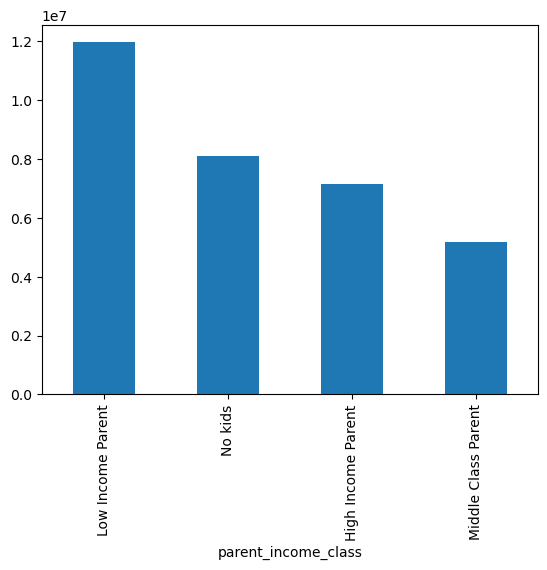

In [62]:
#Create bar graph for customer segment 1 (parent income class)
bar_1 = df_merged['parent_income_class'].value_counts().plot.bar()

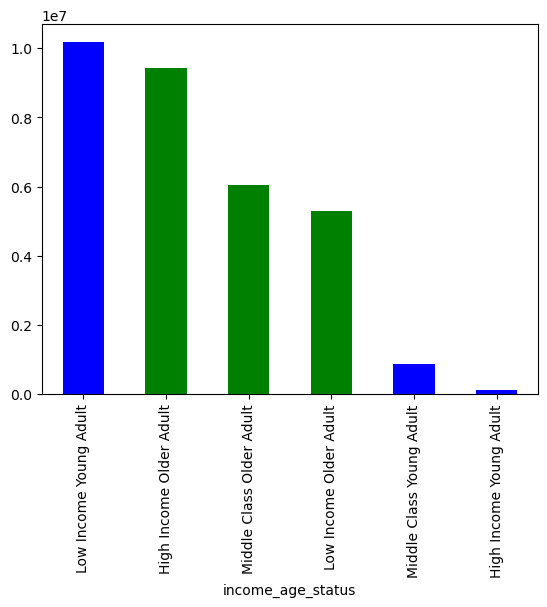

In [61]:
#Create bar graph for customer segment 2 (income and age status)
bar_2 = df_merged['income_age_status'].value_counts().plot.bar(color = ['blue', 'green', 'green','green', 'blue', 'blue'])

## -

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [65]:
#Aggreagated customer segment 1 (parent income class), by expenditure
df_merged.groupby('parent_income_class').agg({'prices': ['mean','min','max']})

prices              
                          mean  min      max
parent_income_class                         
High Income Parent   20.112282  1.0  99999.0
Low Income Parent     8.044846  1.0  99999.0
Middle Class Parent   9.613877  1.0  99999.0
No kids              12.129243  1.0  99999.0

In [66]:
#Remove outlier max prices
df_merged.loc[df_merged['prices'] > 100] = np.nan

In [67]:
#Rerun
#Aggreagated customer segment 1 (parent income class), by expenditure
df_merged.groupby('parent_income_class').agg({'prices': ['mean','min','max']})

prices           
                         mean  min   max
parent_income_class                     
High Income Parent   7.960458  1.0  25.0
Low Income Parent    7.615892  1.0  25.0
Middle Class Parent  7.963024  1.0  25.0
No kids              7.789975  1.0  25.0

In [68]:
#Aggreagated customer segment 2 (age income status), by expenditure
df_merged.groupby('income_age_status').agg({'prices': ['mean','min','max']})

prices           
                              mean  min   max
income_age_status                            
High Income Older Adult   7.959974  1.0  25.0
High Income Young Adult   7.815447  1.0  25.0
Low Income Older Adult    7.300382  1.0  25.0
Low Income Young Adult    7.771446  1.0  25.0
Middle Class Older Adult  7.967044  1.0  25.0
Middle Class Young Adult  7.951455  1.0  25.0

In [69]:
#Aggreagated customer segment 1 (parent income class), by usage
df_merged.groupby('parent_income_class').agg({'order_number': ['mean','min','max']})

order_number           
                            mean  min   max
parent_income_class                        
High Income Parent     17.160725  1.0  99.0
Low Income Parent      17.015673  1.0  99.0
Middle Class Parent    17.219472  1.0  99.0
No kids                17.264951  1.0  99.0

In [70]:
#Aggreagated customer segment 2 (age income status), by usage
df_merged.groupby('income_age_status').agg({'order_number': ['mean','min','max']})

order_number           
                                 mean  min   max
income_age_status                               
High Income Older Adult     17.272420  1.0  99.0
High Income Young Adult     19.766700  1.0  99.0
Low Income Older Adult      16.706286  1.0  99.0
Low Income Young Adult      17.187882  1.0  99.0
Middle Class Older Adult    17.276679  1.0  99.0
Middle Class Young Adult    16.558580  1.0  99.0

## -

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [71]:
#Compare customer segment 1 with regions
df_merged.groupby('region')['parent_income_class'].value_counts()

region     parent_income_class
Midwest    Low Income Parent      2757079
           No kids                1904908
           High Income Parent     1698839
           Middle Class Parent    1235239
Northeast  Low Income Parent      2090591
           No kids                1418086
           High Income Parent     1281340
           Middle Class Parent     931875
South      Low Income Parent      4045158
           No kids                2701219
           High Income Parent     2350946
           Middle Class Parent    1692773
West       Low Income Parent      3074747
           No kids                2072062
           High Income Parent     1818081
           Middle Class Parent    1326789
Name: count, dtype: int64

In [84]:
#Compare customer segment 1 with departments
df_merged.groupby('department_id')['parent_income_class'].value_counts()

department_id  parent_income_class
1.0            Low Income Parent      816442
               No kids                557160
               High Income Parent     502476
               Middle Class Parent    358665
2.0            Low Income Parent       13311
                                       ...  
20.0           Middle Class Parent    169640
21.0           Low Income Parent       25471
               No kids                 17088
               High Income Parent      15427
               Middle Class Parent     11159
Name: count, Length: 84, dtype: int64

In [86]:
#Compare customer segment 2 with regions
df_merged.groupby('region')['income_age_status'].value_counts()

region     income_age_status       
Midwest    Low Income Young Adult      2364067
           High Income Older Adult     2248501
           Middle Class Older Adult    1435040
           Low Income Older Adult      1208175
           Middle Class Young Adult     206646
           High Income Young Adult       29985
Northeast  Low Income Young Adult      1791094
           High Income Older Adult     1678293
           Middle Class Older Adult    1072368
           Low Income Older Adult       930403
           Middle Class Young Adult     145176
           High Income Young Adult       22848
South      Low Income Young Adult      3434111
           High Income Older Adult     3104647
           Middle Class Older Adult    1965810
           Low Income Older Adult      1785336
           Middle Class Young Adult     292546
           High Income Young Adult       48378
West       Low Income Young Adult      2586112
           High Income Older Adult     2405005
           Middle Class 

In [87]:
#Compare customer segment 2 with departments
df_merged.groupby('department_id')['income_age_status'].value_counts()

department_id  income_age_status       
1.0            Low Income Young Adult      696799
               High Income Older Adult     661539
               Middle Class Older Adult    418556
               Low Income Older Adult      356329
               Middle Class Young Adult     58230
                                            ...  
21.0           High Income Older Adult      20258
               Middle Class Older Adult     12612
               Low Income Older Adult       11134
               Middle Class Young Adult      1847
               High Income Young Adult        186
Name: count, Length: 126, dtype: int64

## -

## 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [99]:
#Crosstab for bar chart 1
cross_region_parent_income_class = pd.crosstab(df_merged['parent_income_class'],df_merged['region'])

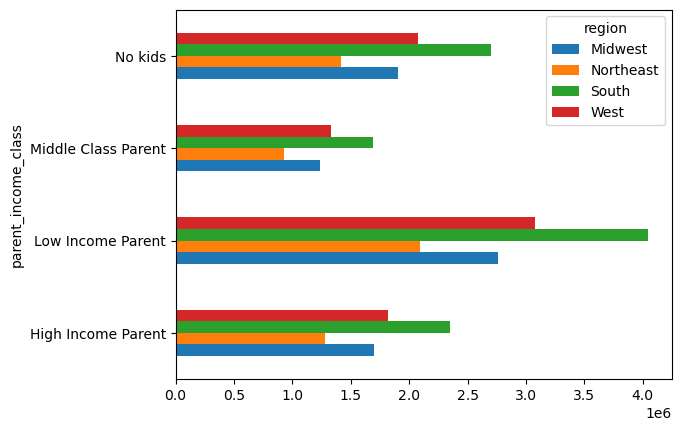

In [103]:
##Bar chart showing parent income class by region
region_bar_1 = cross_region_parent_income_class.plot.barh()

In [98]:
#Crosstab for bar chart 2
cross_region_income_age_status = pd.crosstab(df_merged['income_age_status'],df_merged['region'])

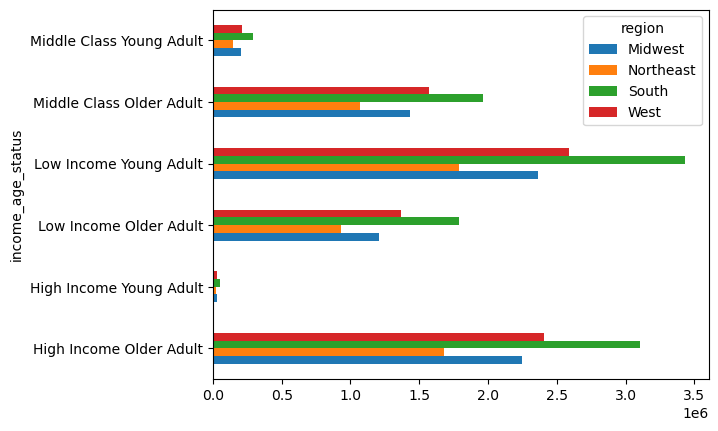

In [105]:
#Bar chart for  income and age status by region
region_bar_2 = cross_region_income_age_status.plot.barh()

In [104]:
#Crosstab for bar chart 3
cross_region_spender_type = pd.crosstab(df_merged['spender_type'], df_merged['region'])

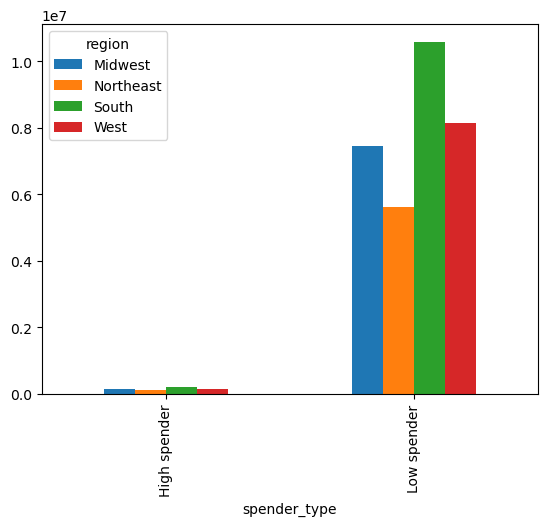

In [106]:
#Bar chart for spender type by region
region_bar_3 = cross_region_spender_type.plot.bar()

### *Export and save all visualizations in project folder*

In [107]:
#Save region bar 1
region_bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cross_region_parent_income_class.png'))

In [108]:
#Save region bar 2
region_bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','cross_region_income_age_status.png'))

In [109]:
#Save region bar 3
region_bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cross_region_spender_type.png'))

In [113]:
#Save bar 1 (From step 6 - parent income customer segment)
bar_1.figure.savefig(os.path.join(path, '04 Analysis' ,'Visualizations','parent_income_class.png'))

In [112]:
#Save bar 2(From step 6 - income age customer segment)
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','income_age_status.png'))

## -

## 10. Tidy up your script, export your final data set, and save your notebook.

### *Export and save final table as PKL file*

In [114]:
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_final.pkl'))